In [1]:
import importlib
from pathlib import Path
import itertools
import pickle

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from scipy.stats import pearsonr, spearmanr
import scipy.stats
from statsmodels import api as sm
import pyBigWig
import logomaker
import json

from Modules import utils, plot_utils

In [2]:
importlib.reload(utils)
importlib.reload(plot_utils)
data_dir = '../shared_folder'
writing_dir = '../shared_folder'
# writing_dir='../'
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
def mywho():
    np.who({k: v for k, v in globals().items() if k[0]!= '_'})

In [3]:
species = 'SCerevisiae'

Load one_hot genomes

In [4]:
with np.load(Path(data_dir, species, 'genome', 'W303_Mmmyco.npz')) as f:
    one_hots_myco = {k: f[k] for k in f.keys()}
with np.load(Path(data_dir, species, 'genome', 'S288c_Mpneumo.npz')) as f:
    one_hots_pneu = {k: f[k] for k in f.keys() if k != 'Mito'}

Load labels

In [5]:
with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_myco_coh.npz')) as f:
    myco_coh = {k: f[k] for k in f.keys()}
with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_myco_pol.npz')) as f:
    myco_pol = {k: f[k] for k in f.keys()}
with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_pneu_coh.npz')) as f:
    pneu_coh = {k: f[k] for k in f.keys()}
with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_pneu_pol.npz')) as f:
    pneu_pol = {k: f[k] for k in f.keys()}

with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_myco_coh_KL.npz')) as f:
    myco_coh_KL = {k: f[k] for k in f.keys()}
with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_myco_pol_KL.npz')) as f:
    myco_pol_KL = {k: f[k] for k in f.keys()}
with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_pneu_coh_KL.npz')) as f:
    pneu_coh_KL = {k: f[k] for k in f.keys()}
with np.load(Path(data_dir, species, 'data', 'GSE217022', 'labels_pneu_pol_KL.npz')) as f:
    pneu_pol_KL = {k: f[k] for k in f.keys()}

lens = {'myco': {k: len(v) for k, v in myco_coh.items()},
        'pneu': {k: len(v) for k, v in pneu_coh.items()}}

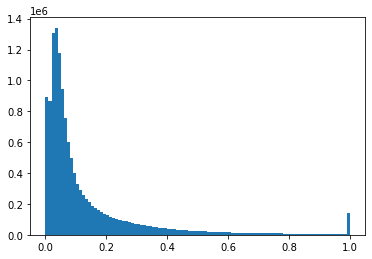

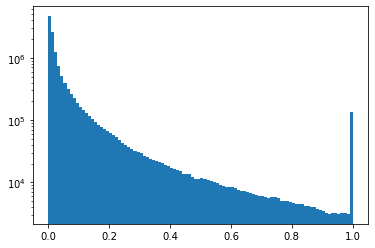

In [6]:
full = np.concatenate(list(myco_coh.values()))
plt.hist(full, bins=100)
plt.show()

full = np.concatenate(list(myco_coh_KL.values()))
plt.hist(full, bins=100)
plt.yscale('log')
plt.show()

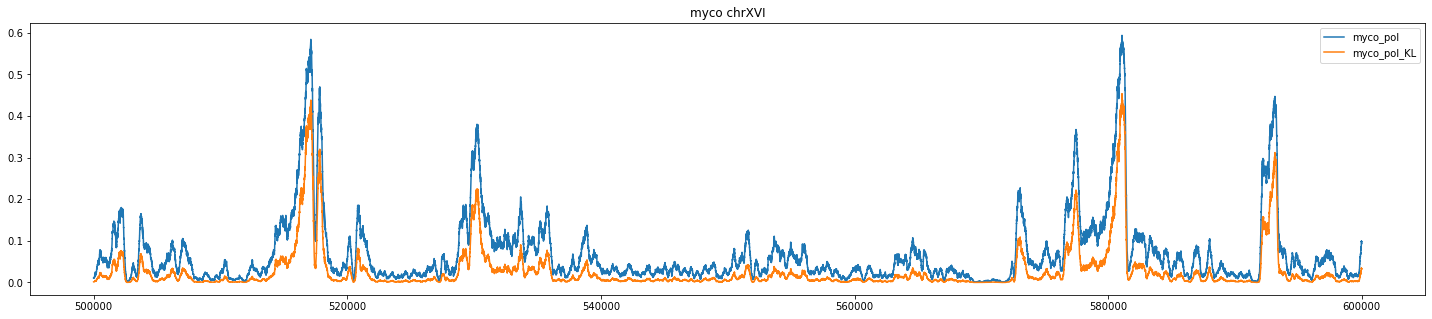

In [9]:
strand = 'myco' # 'pneu' #
chr_id = 'XVI'
start = 500_000
stop = start + 100_000

fig, ax = plt.subplots(1, 1, figsize=(25, 5), facecolor='w')
if strand == 'myco' and chr_id != 'Mmmyco':
    chr_id = 'chr' + chr_id
stop = min(stop, lens[strand][chr_id])

plt.title(f'{strand} {chr_id}')
# ax.plot(np.arange(start, stop), pneu_coh_KL[chr_id][start:stop], label='pneu_coh')
# ax.plot(np.arange(start, stop), pneu_coh[chr_id][start:stop], label='pneu_coh')
ax.plot(np.arange(start, stop), myco_pol[chr_id][start:stop], label='myco_pol')
ax.plot(np.arange(start, stop), myco_pol_KL[chr_id][start:stop], label='myco_pol_KL')
plt.legend()

Compute GC content

In [42]:
gc_W303 = utils.GC_content(np.expand_dims(np.concatenate([v for k, v in one_hots_myco.items() if k!='Mmmyco']), axis=0))
gc_S288c = utils.GC_content(np.expand_dims(np.concatenate([v for k, v in one_hots_pneu.items() if k!='Mpneumo']), axis=0))
gc_myco = utils.GC_content(np.expand_dims(one_hots_myco['Mmmyco'], axis=0))
gc_pneu = utils.GC_content(np.expand_dims(one_hots_pneu['Mpneumo'], axis=0))    
print(gc_W303, gc_S288c, gc_myco, gc_pneu)

[0.38334965] [0.38297367] [0.24156089] [0.40010954]
